In [51]:
words = open("./names.txt", "r").read().splitlines()

In [52]:
len(words)

32033

In [53]:
min(len(w) for w in words)

2

In [54]:
max(len(w) for w in words)

15

In [55]:
bigram_counts = {}

for w in words:
    chars = ['<S>'] + list(w) + ['<E>']
    for c1, c2 in zip(chars, chars[1:]):
        bigram = (c1, c2)
        bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1 

In [56]:
sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [57]:
import torch

In [58]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [59]:
alphabet = ["."] + list("abcdefghijklmnopqrstuvwxyz")
stoi = {c: i for i, c in enumerate(alphabet)}
itos = {i: c for i, c in enumerate(alphabet)}

In [60]:
for w in words:
    chars = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chars, chars[1:]):
        N[stoi[c1], stoi[c2]] += 1

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

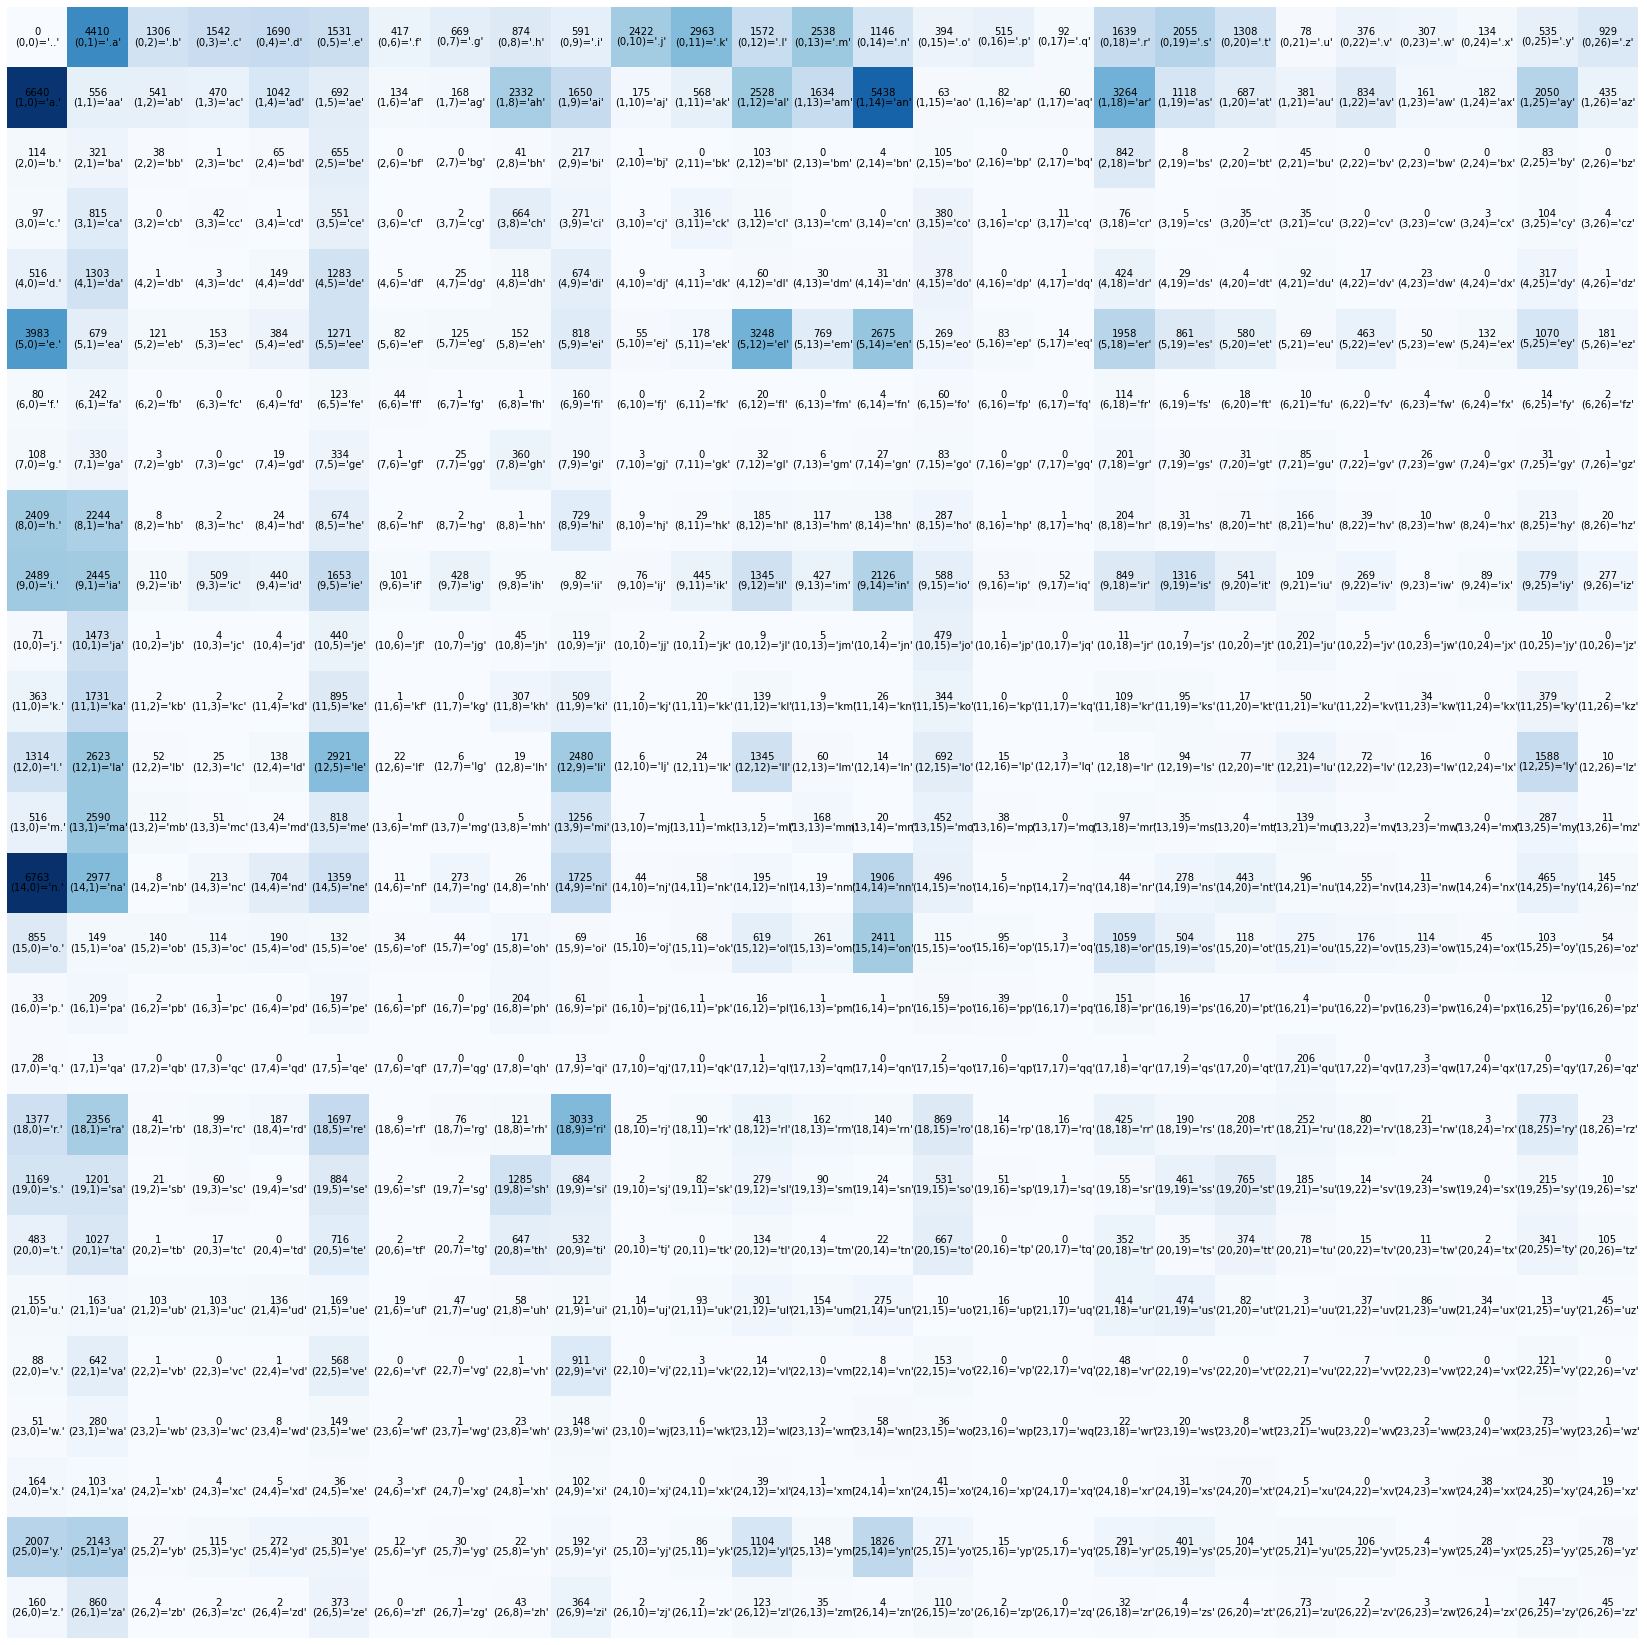

In [62]:
plt.figure(figsize=(30, 30))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        ch = itos[i] + itos[j]
        plt.text(j, i, N[i, j].item(), ha="center", va="bottom", color="black")
        plt.text(j, i, f"({i},{j})='{ch}'", ha="center", va="top", color="black")
plt.axis("off");

In [63]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [64]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [65]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
char = itos[ix]
char

'm'

In [75]:
# probabilities with smoothing
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

In [76]:
ix = 0
g = torch.Generator().manual_seed(2147483647)

out_words = []
for i in range(5):
    word = []
    while True:
        probs = P[ix]
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        char = itos[ix]
        word.append(char)
        if char == '.':
            break
    out_words.append(word)

[''.join(w) for w in out_words]

['mor.', 'axx.', 'minaymoryles.', 'kondlaisah.', 'anchshizarie.']

In [77]:
log_likelyhood = 0
n = 0
for w in ["benjamin"]:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        # prob = P[ix1, ix2]
        # logprob = torch.log(prob)
        # print(f"{c1}{c2}, p={prob} logp={logprob}")
        log_likelyhood += torch.log(P[ix1, ix2])
        n += 1

nll = -log_likelyhood
normalized_nll = nll / n
print(f"{nll=}, {normalized_nll=}")

nll=tensor(21.1544), normalized_nll=tensor(2.3505)
